# Import

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Import dataSet

In [2]:
df = pd.read_csv("heart_attack_prediction_dataset.csv")

# Initial view of data

In [3]:
print("First few records:\n", df.head())
print("\nData Info:")
df.info()
print("\nStatistical Summary:\n", df.describe())

First few records:
   Patient ID  Age     Sex  Cholesterol Blood Pressure  Heart Rate  Diabetes  \
0    BMW7812   67    Male          208         158/88          72         0   
1    CZE1114   21    Male          389         165/93          98         1   
2    BNI9906   21  Female          324         174/99          72         1   
3    JLN3497   84    Male          383        163/100          73         1   
4    GFO8847   66    Male          318          91/88          93         1   

   Family History  Smoking  Obesity  ...  Sedentary Hours Per Day  Income  \
0               0        1        0  ...                 6.615001  261404   
1               1        1        1  ...                 4.963459  285768   
2               0        0        0  ...                 9.463426  235282   
3               1        1        0  ...                 7.648981  125640   
4               1        1        1  ...                 1.514821  160555   

         BMI  Triglycerides  Physical Acti

# preprocessing

## Check Null

In [4]:
print(df.isnull().sum())

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64


## Identification and processing of outliers

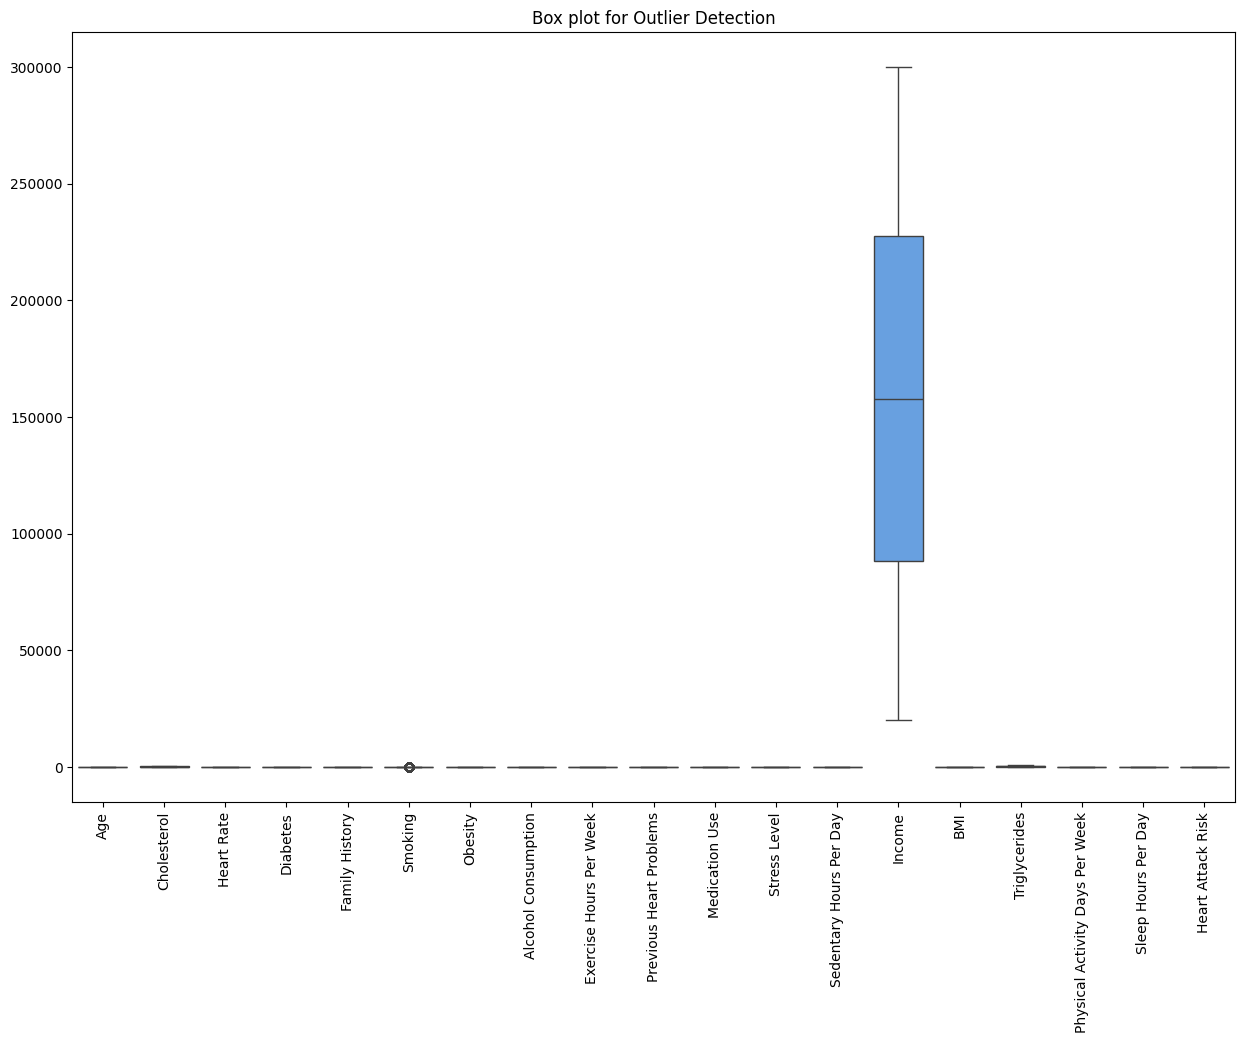

In [5]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.title("Box plot for Outlier Detection")
plt.xticks(rotation=90)
plt.show()

## Drop Patient ID

In [6]:
df = df.drop('Patient ID' , axis=1)

## Coding nominal data

In [7]:
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Feature distribution analysis

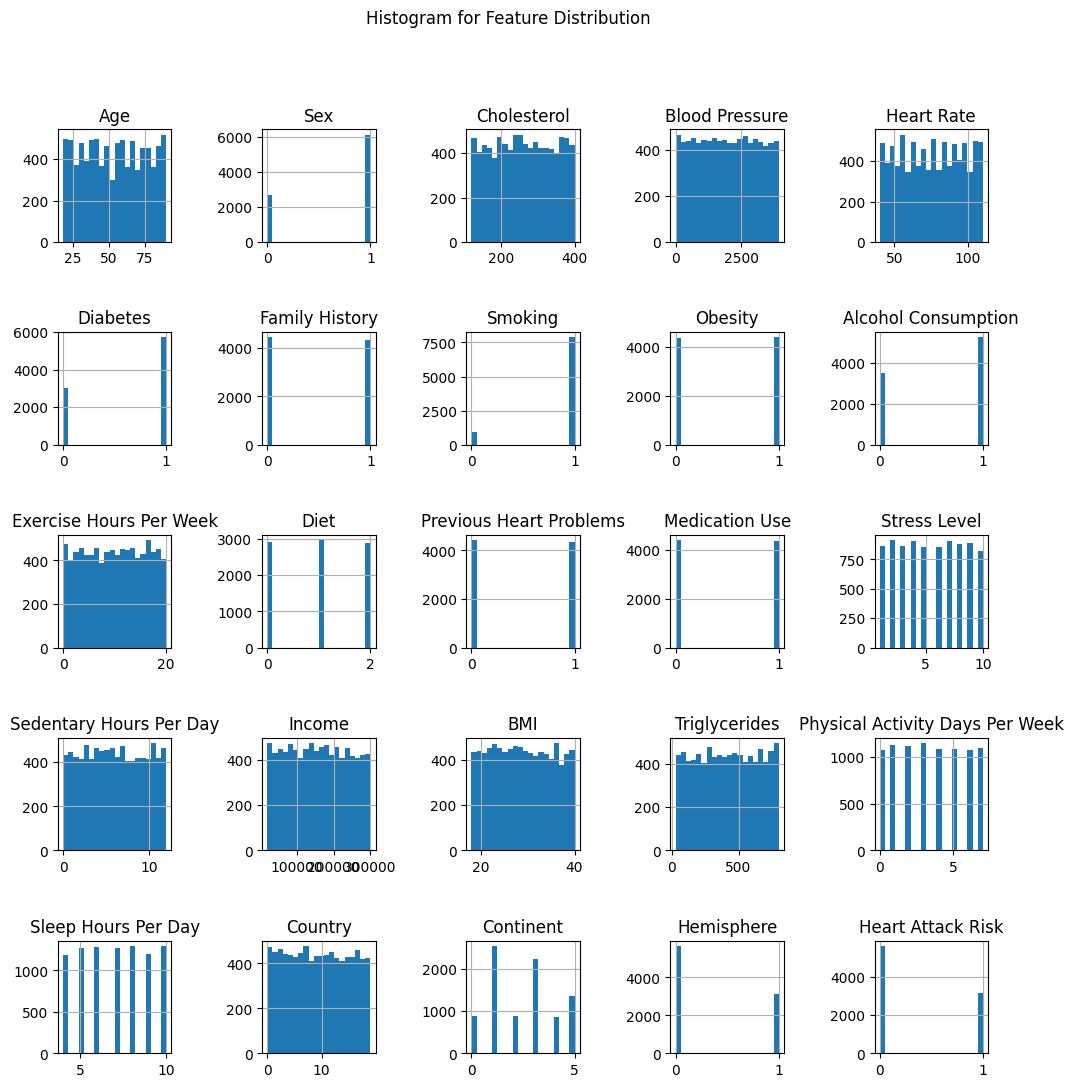

In [8]:
df.hist(figsize=(12, 12), bins=20)
plt.suptitle("Histogram for Feature Distribution")
plt.subplots_adjust(hspace=0.8 , wspace=0.8)
plt.show()

# Split data into attributes and tags

In [9]:
X = df.drop('Heart Attack Risk', axis=1) 
y = df['Heart Attack Risk']

## Dividing data into training and test sets

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Data standardization

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)

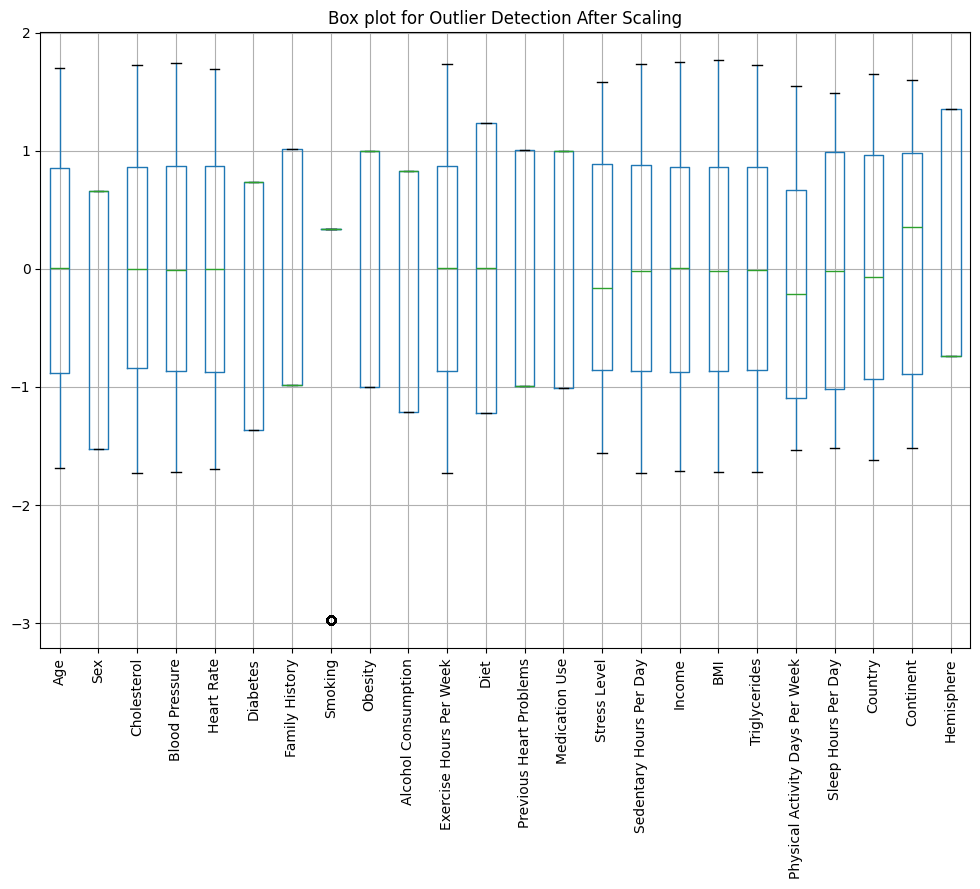

In [14]:
plt.figure(figsize=(12, 8))
X_train_scaled_df.boxplot()
plt.xticks(rotation=90)
plt.title("Box plot for Outlier Detection After Scaling")
plt.show()

# Creation and training of DecisionTree With Gini criterion

In [15]:
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=84)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=84)

# Model prediction and evaluation

In [16]:
y_pred = dt_model.predict(X_test)

# Calculation of model accuracy and size metrics

In [17]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6417569880205363
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.97      0.78      1125
           1       0.50      0.05      0.09       628

    accuracy                           0.64      1753
   macro avg       0.57      0.51      0.43      1753
weighted avg       0.59      0.64      0.53      1753

Confusion Matrix:
 [[1093   32]
 [ 596   32]]


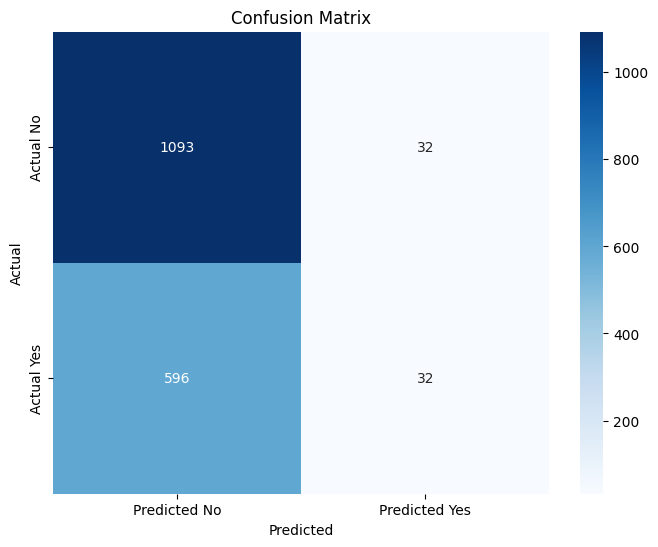

In [18]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# The importance of features and their impact

In [19]:
feature_importances = dt_model.feature_importances_
features = X.columns 
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

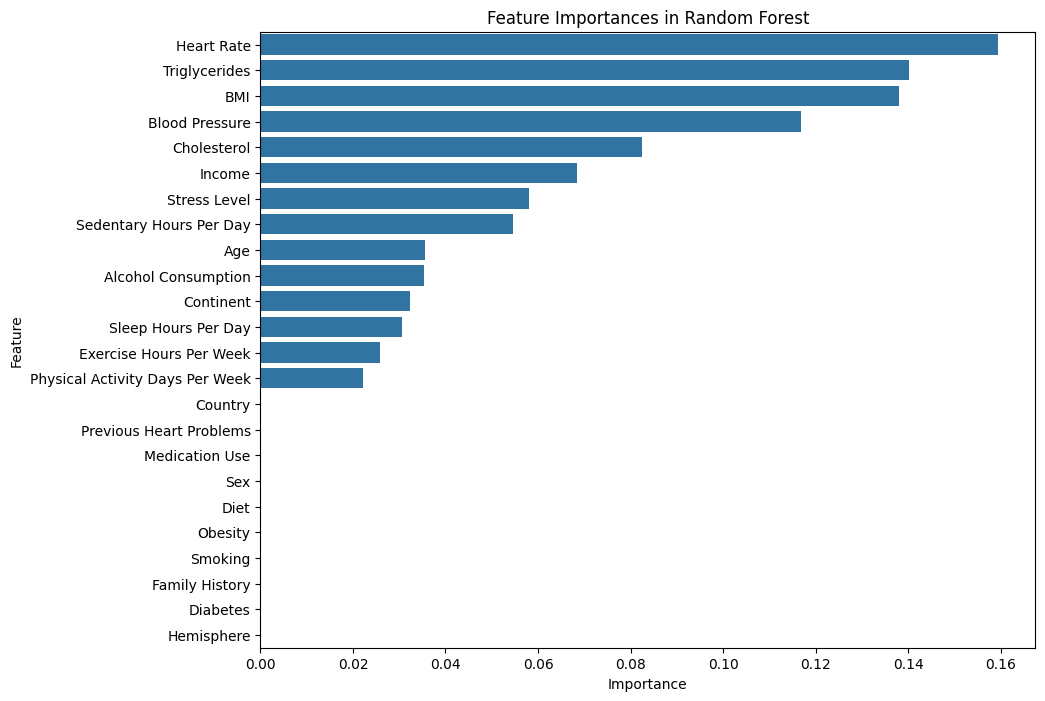

In [20]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importances in Random Forest")
plt.show()

# General form of decision tree

In [21]:
plt.figure(figsize=(100, 100))
plot_tree(dt_model, feature_names=X.columns, class_names=['Class 0', 'Class 1'], filled=True)
plt.show()

In [22]:
from sklearn.tree import export_text

tree_rules = export_text(dt_model, feature_names=list(X.columns))
print(tree_rules)

|--- BMI <= 1.76
|   |--- BMI <= -1.54
|   |   |--- Blood Pressure <= 0.35
|   |   |   |--- Income <= 1.08
|   |   |   |   |--- Stress Level <= -0.69
|   |   |   |   |   |--- Continent <= -1.20
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Continent >  -1.20
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- Stress Level >  -0.69
|   |   |   |   |   |--- Triglycerides <= -1.26
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Triglycerides >  -1.26
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- Income >  1.08
|   |   |   |   |--- Cholesterol <= 1.12
|   |   |   |   |   |--- Alcohol Consumption <= -0.19
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Alcohol Consumption >  -0.19
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- Cholesterol >  1.12
|   |   |   |   |   |--- class: 1
|   |   |--- Blood Pressure >  0.35
|   |   |   |--- BMI <= -1.67
|   |   |   |   |--- Age <= -1.29
|   |   |   |   |   |--- class: 1
|   |

# Creation and training of DecisionTree With entropy criterion

In [36]:
dt_model2 = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=84)
dt_model2.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=84)

In [38]:
y_pred2 = dt_model2.predict(X_test)

In [39]:
print("Accuracy:", accuracy_score(y_test, y_pred2))
print("Classification Report:\n", classification_report(y_test, y_pred2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))

Accuracy: 0.6406160867084997
Classification Report:
               precision    recall  f1-score   support

           0       0.64      1.00      0.78      1125
           1       0.00      0.00      0.00       628

    accuracy                           0.64      1753
   macro avg       0.32      0.50      0.39      1753
weighted avg       0.41      0.64      0.50      1753

Confusion Matrix:
 [[1123    2]
 [ 628    0]]


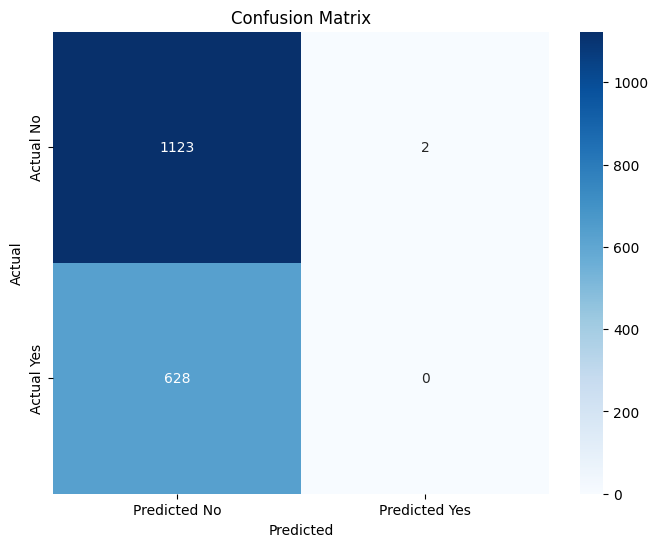

In [40]:
conf_matrix = confusion_matrix(y_test, y_pred2)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Creation and training of DecisionTree With log loss criterion

In [32]:
dt_model1 = DecisionTreeClassifier(criterion='log_loss', max_depth=6, random_state=84)
dt_model1.fit(X_train, y_train)


DecisionTreeClassifier(criterion='log_loss', max_depth=6, random_state=84)

In [34]:
y_pred1 = dt_model1.predict(X_test)

In [35]:
print("Accuracy:", accuracy_score(y_test, y_pred1))
print("Classification Report:\n", classification_report(y_test, y_pred1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred1))

Accuracy: 0.6406160867084997
Classification Report:
               precision    recall  f1-score   support

           0       0.64      1.00      0.78      1125
           1       0.00      0.00      0.00       628

    accuracy                           0.64      1753
   macro avg       0.32      0.50      0.39      1753
weighted avg       0.41      0.64      0.50      1753

Confusion Matrix:
 [[1123    2]
 [ 628    0]]


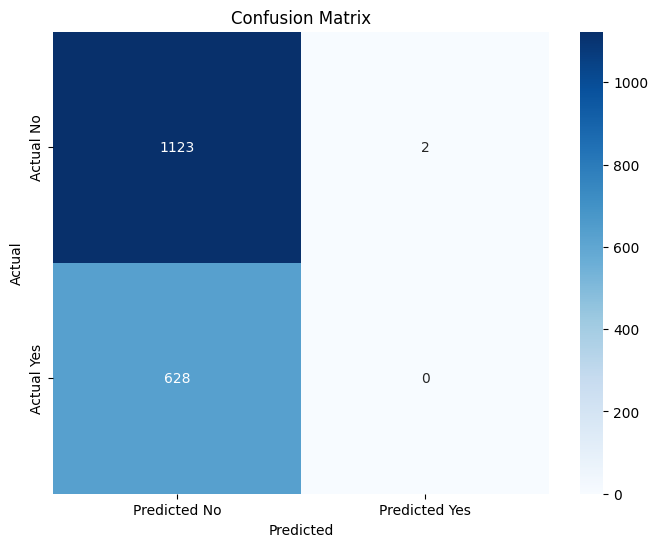

In [41]:
conf_matrix = confusion_matrix(y_test, y_pred1)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()